In [1]:
# Imports
import sys
import os
import pickle
import numpy as np
import time
from mpi4py import MPI
import matplotlib.pyplot as plt

PROJECT_ROOT = os.path.abspath(os.path.join(os.path.abspath('..'),os.pardir))
sys.path.append(PROJECT_ROOT)

from electronTransportCode.SimulationDomain import SimulationDomain
from electronTransportCode.Material import unitDensityMaterial
from electronTransportCode.MCEstimator import TrackEndEstimator
from electronTransportCode.ParticleModel import KDRTestParticle
from electronTransportCode.SimOptions import PointSource
from electronTransportCode.MCParticleTracer import KDR, AnalogParticleTracer
from electronTransportCode.ProjectUtils import PROJECT_ROOT
%matplotlib widget

In [2]:
# Plot distribution for which particle? ('1', '2', or '3')
EfixedType = '1'
if EfixedType == '1': 
    dirname = '/numericalExperiments/KDRTest/data/lowE'
elif EfixedType == '2':
    dirname = '/numericalExperiments/KDRTest/data/midE'
elif EfixedType == '3':
    dirname = '/numericalExperiments/KDRTest/data/highE'
else:
    raise ValueError

In [3]:

teeDict = dict()
for filename in os.listdir(PROJECT_ROOT + dirname):
    if 'trackEndEstimator' in filename:
        truncFilename = filename.replace('trackEndEstimator', '').replace('.pkl', '')
        TEEx, _, _ = pickle.load(open(PROJECT_ROOT + dirname + '/' + filename, 'rb'))
        bincenter, binval = TEEx.getDensityData()
        teeDict[truncFilename] = np.column_stack((bincenter, binval))

eSource, NB_PARTICLES = pickle.load(open(PROJECT_ROOT + dirname + '/simargv.pkl', 'rb'))
print(eSource, NB_PARTICLES)

3.0285922835333117 999984


Text(0.5, 1.0, '$16 \\Delta s$')

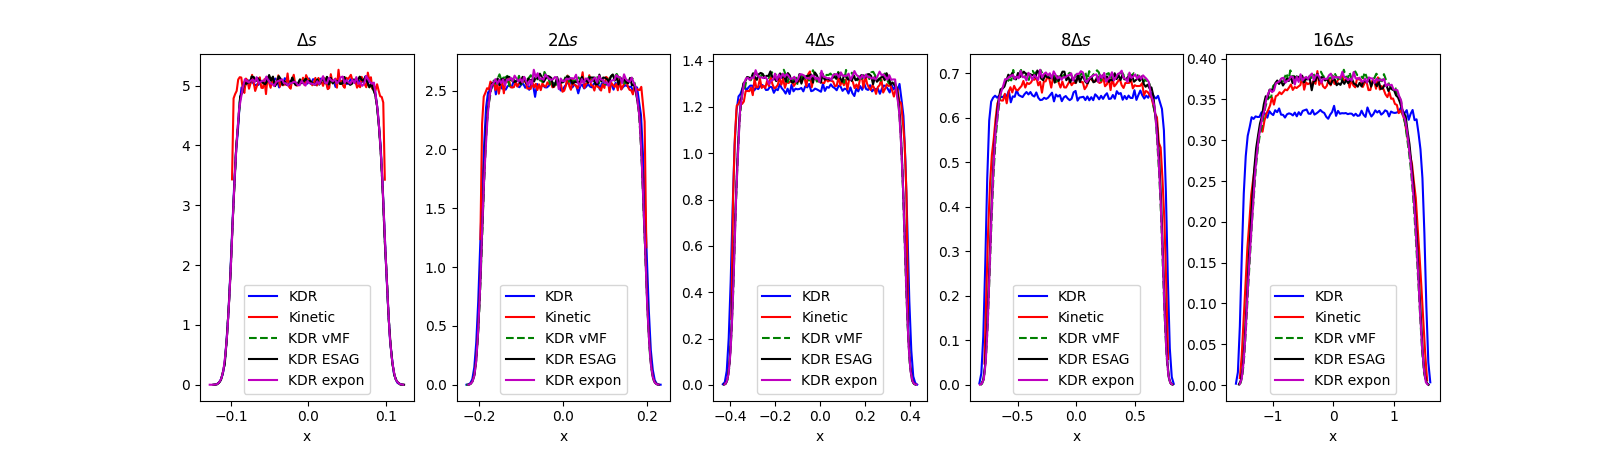

In [4]:
kdrstr = '-b'
kdrvmfstr = '--g'
kstr = '-r'
esagstr = '-k'
exponstr = '-m'

kdrLabel = 'KDR'
kineticLabel = 'Kinetic'
kdrvmfLabel = 'KDR vMF'
kdresagLabel = 'KDR ESAG'
kdrexponLabel = 'KDR expon'

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(16, 4.5))
ax1.plot(teeDict['kdr1'][:, 0], teeDict['kdr1'][:, 1], kdrstr, label=kdrLabel)
ax1.plot(teeDict['k1'][:, 0], teeDict['k1'][:, 1], kstr, label=kineticLabel)
ax1.plot(teeDict['kdrvmf1'][:, 0], teeDict['kdrvmf1'][:, 1], kdrvmfstr, label=kdrvmfLabel)
ax1.plot(teeDict['kdresag1'][:, 0], teeDict['kdresag1'][:, 1], esagstr, label=kdresagLabel)
ax1.plot(teeDict['kdrexpon1'][:, 0], teeDict['kdrexpon1'][:, 1], exponstr, label=kdrexponLabel)

ax1.legend()
ax1.set_xlabel('x')
ax1.set_title('$\Delta s$')

ax2.plot(teeDict['kdr2'][:, 0], teeDict['kdr2'][:, 1], kdrstr, label=kdrLabel)
ax2.plot(teeDict['k2'][:, 0], teeDict['k2'][:, 1], kstr, label=kineticLabel)
ax2.plot(teeDict['kdrvmf2'][:, 0], teeDict['kdrvmf2'][:, 1], kdrvmfstr, label=kdrvmfLabel)
ax2.plot(teeDict['kdresag2'][:, 0], teeDict['kdresag2'][:, 1], esagstr, label=kdresagLabel)
ax2.plot(teeDict['kdrexpon2'][:, 0], teeDict['kdrexpon2'][:, 1], exponstr, label=kdrexponLabel)
ax2.legend()
ax2.set_xlabel('x')
ax2.set_title('$2 \Delta s$')

ax3.plot(teeDict['kdr4'][:, 0], teeDict['kdr4'][:, 1], kdrstr, label=kdrLabel)
ax3.plot(teeDict['k4'][:, 0], teeDict['k4'][:, 1], kstr, label=kineticLabel)
ax3.plot(teeDict['kdrvmf4'][:, 0], teeDict['kdrvmf4'][:, 1], kdrvmfstr, label=kdrvmfLabel)
ax3.plot(teeDict['kdresag4'][:, 0], teeDict['kdresag4'][:, 1], esagstr, label=kdresagLabel)
ax3.plot(teeDict['kdrexpon4'][:, 0], teeDict['kdrexpon4'][:, 1], exponstr, label=kdrexponLabel)
ax3.legend()
ax3.set_xlabel('x')
ax3.set_title('$4 \Delta s$')

ax4.plot(teeDict['kdr8'][:, 0], teeDict['kdr8'][:, 1], kdrstr, label=kdrLabel)
ax4.plot(teeDict['k8'][:, 0], teeDict['k8'][:, 1], kstr, label=kineticLabel)
ax4.plot(teeDict['kdrvmf8'][:, 0], teeDict['kdrvmf8'][:, 1], kdrvmfstr, label=kdrvmfLabel)
ax4.plot(teeDict['kdresag8'][:, 0], teeDict['kdresag8'][:, 1], esagstr, label=kdresagLabel)
ax4.plot(teeDict['kdrexpon8'][:, 0], teeDict['kdrexpon8'][:, 1], exponstr, label=kdrexponLabel)
ax4.legend()
ax4.set_xlabel('x')
ax4.set_title('$8 \Delta s$')

ax5.plot(teeDict['kdr16'][:, 0], teeDict['kdr16'][:, 1], kdrstr, label=kdrLabel)
ax5.plot(teeDict['k16'][:, 0], teeDict['k16'][:, 1], kstr, label=kineticLabel)
ax5.plot(teeDict['kdrvmf16'][:, 0], teeDict['kdrvmf16'][:, 1], kdrvmfstr, label=kdrvmfLabel)
ax5.plot(teeDict['kdresag16'][:, 0], teeDict['kdresag16'][:, 1], esagstr, label=kdresagLabel)
ax5.plot(teeDict['kdrexpon16'][:, 0], teeDict['kdrexpon16'][:, 1], exponstr, label=kdrexponLabel)
ax5.legend()
ax5.set_xlabel('x')
ax5.set_title('$16 \Delta s$')

Text(0.5, 1.0, '$16 \\Delta s$')

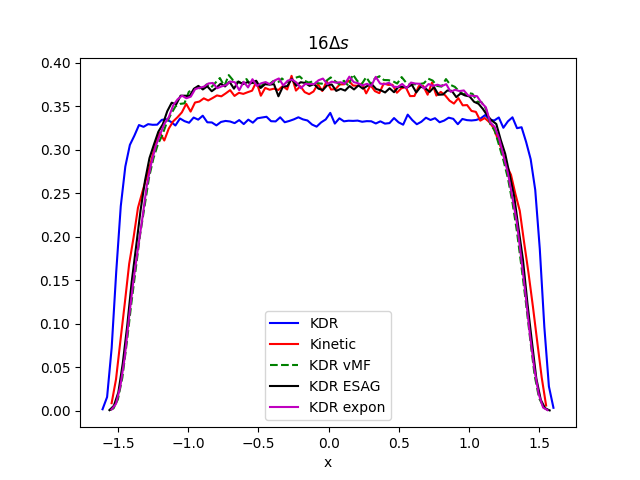

In [5]:
fig, ax = plt.subplots(1, 1)
ax.plot(teeDict['kdr16'][:, 0], teeDict['kdr16'][:, 1], kdrstr, label=kdrLabel)
ax.plot(teeDict['k16'][:, 0], teeDict['k16'][:, 1], kstr, label=kineticLabel)
ax.plot(teeDict['kdrvmf16'][:, 0], teeDict['kdrvmf16'][:, 1], kdrvmfstr, label=kdrvmfLabel)
ax.plot(teeDict['kdresag16'][:, 0], teeDict['kdresag16'][:, 1], esagstr, label=kdresagLabel)
ax.plot(teeDict['kdrexpon16'][:, 0], teeDict['kdrexpon16'][:, 1], exponstr, label=kdrexponLabel)
ax.legend()
ax.set_xlabel('x')
ax.set_title('$16 \Delta s$')

In [6]:
import timeit
s1 = 'import scipy.stats'
s2 = 'import numpy as np'


c1 = """
def sp(x):
    return scipy.stats.lognorm.rvs(s=1, size = 1)
"""

c2 = """
def nprvs():
    return np.random.lognormal(size=1)
"""
N = 100
spsamples = np.array(timeit.repeat(stmt=c1, setup=s1, repeat=N), dtype=float)
npsamples = np.array(timeit.repeat(stmt=c2, setup=s2, repeat=N), dtype=float)


In [7]:
print(spsamples.mean())
print(npsamples.mean())

0.07786394052001924
0.07715931901006115


In [10]:
import scipy.stats
scipy.stats.lognorm.rvs(s=1, size = 1)[0]

1.1379824487545709